# Titanic Dataset

## 1) Look at the big picture

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## 2) Get the data 

Instructions and data at:
https://www.kaggle.com/c/titanic/overview

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('datasets/train.csv')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df.shape

(891, 12)

## 3) Discover and visualize the data to gain insights

### Numerical Data

In [129]:
num_cols = ['Age', 'Fare'] 

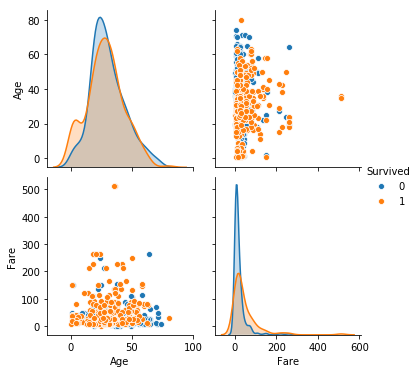

In [130]:
sns.pairplot(data=df[num_cols + ['Survived']], hue='Survived')

In [213]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


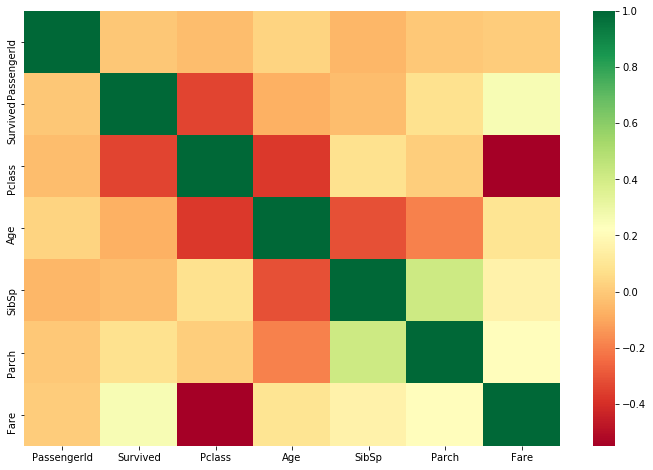

In [214]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdYlGn')

### Categorical Data

In [215]:
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
# cat_cols = ['Pclass', 'Sex', 'SibSp', 'Embarked']

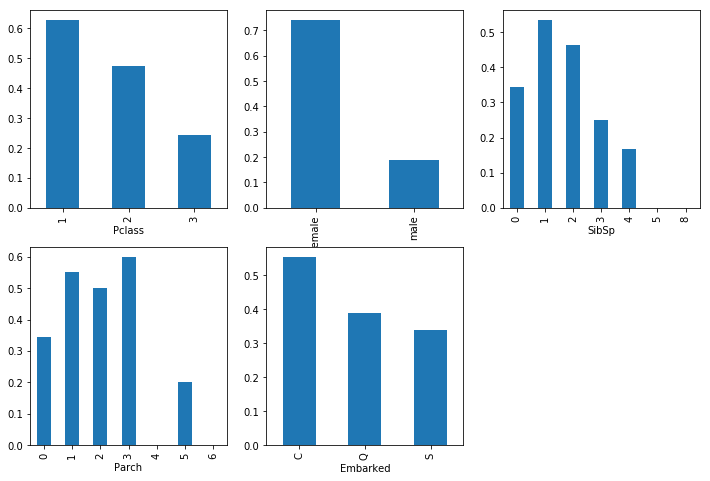

In [216]:
plt.figure(figsize=(12,8))

for idx, cat in enumerate(cat_cols):
    active_subplot = idx + 1
    plt.subplot(2, 3, active_subplot)
    df.groupby(cat)['Survived'].mean().plot(kind='bar')

## 4) Prepare the data for ML Algorithms

Let's build 2 pipelines, one for numerical data and other for categorical data

### Categorical Pipeline

In [227]:
from sklearn.impute import SimpleImputer

In [228]:
df_cat = df[cat_cols]

In [229]:
imputer = SimpleImputer(strategy='most_frequent')
darray_cat = imputer.fit_transform(df_cat)

In [230]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit_transform(darray_cat).toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [231]:
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])

### Numerical Pipeline

In [232]:
df_num = df[num_cols]

In [142]:
imputer = SimpleImputer(strategy='median')

imputer.fit_transform(df_num)[:10]
print(imputer.statistics_) # Medians!

[28.     14.4542]


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df_num)

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [144]:
num_pipeline = Pipeline([
    ('median_imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

## Full Pipeline

In [145]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_cols),
    ("num", num_pipeline, num_cols),
])

In [174]:
df_total = pd.concat([df, df_test])
df_total = df_total.drop(['Survived'], axis=1)

full_pipeline.fit(df_total[cols])

/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked']),
                                ('num',
                                 Pipeline(steps=[('median_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'Fare'])])

In [224]:
X_train =  full_pipeline.transform(df)
X_train.shape

/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


(891, 25)

# Let's Go!

In [270]:
cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.7979798 , 0.81144781, 0.7979798 ])

In [271]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)

In [272]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_pred, y_train) # Hmmmmmmmm nice!!!!

0.9797979797979798

### Let's Be Fancier!

In [184]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

def evaluate_classifiers(Classifiers, X_train, y_train, cv=3, scoring="accuracy", random_state=None):
    evaluations = []
    for Classifier in Classifiers:
        
        try:
            clf = Classifier()
            print("Classifying: ", clf.__class__.__name__)

            evaluations.append((
                clf.__class__.__name__,
                cross_val_score(clf, X_train, y_train, cv=cv, scoring=scoring).mean()
            ))
        except Exception:
            print(Exception)

    return sorted(evaluations, key=lambda x: -x[1])

In [269]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

classifiers_classes = [MLPClassifier, KNeighborsClassifier, SVC, GaussianProcessClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GaussianNB, QuadraticDiscriminantAnalysis, XGBClassifier]



In [246]:
# classifiers_classes = [RandomForestClassifier, SGDClassifier, SVC, KNeighborsClassifier]
evaluations = evaluate_classifiers(classifiers_classes, X_train.toarray(), y_train)

Classifying:  MLPClassifier


/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Classifying:  KNeighborsClassifier
Classifying:  SVC
Classifying:  GaussianProcessClassifier
Classifying:  DecisionTreeClassifier
Classifying:  RandomForestClassifier
Classifying:  AdaBoostClassifier
Classifying:  GaussianNB
Classifying:  QuadraticDiscriminantAnalysis
Classifying:  XGBClassifier


/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [273]:
evaluations

[('SVC', 0.819304152637486),
 ('MLPClassifier', 0.8114478114478114),
 ('GaussianProcessClassifier', 0.8047138047138048),
 ('AdaBoostClassifier', 0.7991021324354658),
 ('XGBClassifier', 0.7979797979797979),
 ('RandomForestClassifier', 0.7833894500561168),
 ('KNeighborsClassifier', 0.7710437710437711),
 ('DecisionTreeClassifier', 0.7665544332211),
 ('QuadraticDiscriminantAnalysis', 0.40852974186307517),
 ('GaussianNB', 0.40740740740740744)]

### Let's tune some of the most promising models!

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
# SVC
param_grid = [
    {
        'C': [0.1, 1, 10, 50, 100],
        'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
        'gamma': ['scale', 'auto']
    }
]

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring="accuracy")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 50, 100],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}],
             scoring='accuracy')

In [192]:
svc_params = grid_search.best_params_

In [194]:
svc_clf = SVC(**svc_params)

In [276]:
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [277]:
cross_val_score(svc_clf, X_train, y_train, cv=3, scoring='accuracy') # It's better!

array([0.81144781, 0.82828283, 0.82828283])

# Let's test on test set

In [206]:
cols = num_cols + cat_cols
cols

['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [207]:
df_total = pd.concat([df, df_test])
df_total = df_total.drop(['Survived'], axis=1)

full_pipeline.fit(df_total[cols])

/home/nakamuta/Documents/Personal/HandsOnMl/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked']),
                                ('num',
                                 Pipeline(steps=[('median_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'Fare'])])

In [211]:
df_test = pd.read_csv('datasets/test.csv')

X_test =  full_pipeline.transform(df_test[cols])
y_pred = svc_clf.predict(X_test)
y_pred.shape

(418,)

In [212]:
df_submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})
df_submission.to_csv('datasets/submission-15-06-2020.csv', index=False)